In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("datasets\game_of_thrones_test.csv")
train = pd.read_csv("datasets\game_of_thrones_train.csv")

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\dimin\AppData\Local\Temp\ipykernel_24488\1353538991.py:1: SyntaxWarning: invalid escape sequence '\g'
  test = pd.read_csv("datasets\game_of_thrones_test.csv")
C:\Users\dimin\AppData\Local\Temp\ipykernel_24488\1353538991.py:2: SyntaxWarning: invalid escape sequence '\g'
  train = pd.read_csv("datasets\game_of_thrones_train.csv")


In [3]:
train.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [4]:
train.describe(include="number").T[["count", "min", "max"]]

,count,min,max
S.No,1557.0,1.0,1557.0
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0


In [5]:
train.isna().sum()

S.No                   0
name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

(array([25., 42., 50., 39., 30., 22., 22., 21., 14., 10., 10., 10.,  6.,
         5.,  6.,  1.,  5.,  6.,  6.,  4.,  1.,  3.,  4.,  1.,  1.,  3.,
         2.,  3.,  2.,  0.,  3.,  2.,  1.,  2.,  2.,  4.,  1.,  1.,  1.,
         1.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  2., 11.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

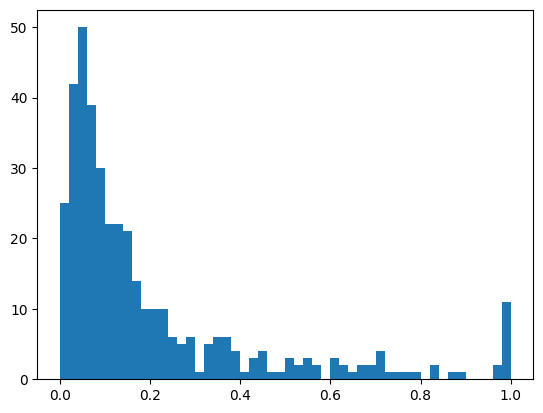

In [6]:
plt.hist(test["popularity"], bins=50)

<Axes: >

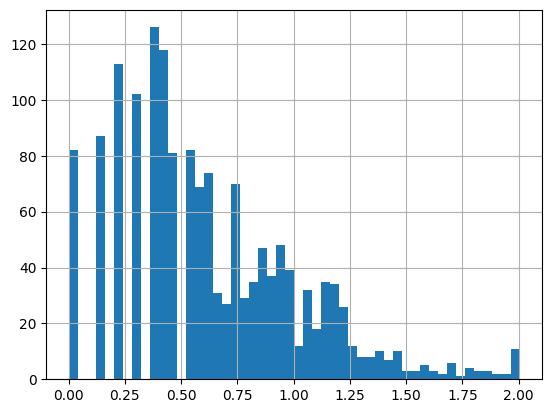

In [7]:
M = 100

np.log10(train["popularity"]*M+1).hist(bins=50)

<Axes: >

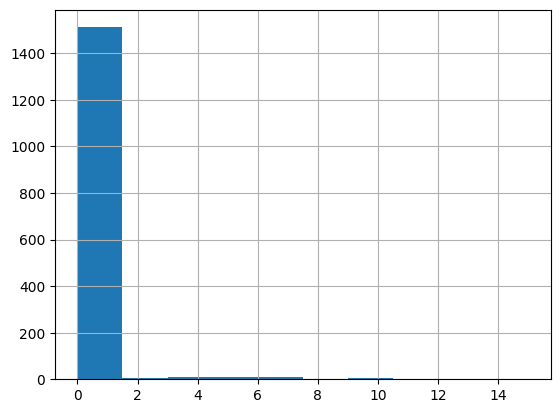

In [8]:
train["numDeadRelations"].hist()

In [9]:
train["boolDeadRelations"] = np.int64(train["numDeadRelations"] > 0)
test["boolDeadRelations"] = np.int64(test["numDeadRelations"] > 0)

In [10]:
train["age_value"] = train["age"].fillna(value=0, axis=0)
train["age_no_data"] = np.float64(np.isnan(train["age"]))

test["age_value"] = test["age"].fillna(value=0, axis=0)
test["age_no_data"] = np.float64(np.isnan(test["age"]))

In [11]:
train["culture"].value_counts(dropna=False)

culture
NaN                        1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Stormlands                    4
Summer Isles                  4
Astapori                      4
Westeros                      3
Dornishmen                    3
Ironmen                       3
Northern mountain clans       3
Westermen                     3
Lysene                        2
westermen                     2
Meereenese                    2
Myrish                        2
Crannogmen                    2


In [12]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

cultures_grouped_inverted = {}

for k in cultures_grouped.keys():
    for v in cultures_grouped[k]:
        cultures_grouped_inverted[v] = k

In [13]:
train["culture_grouped"] = train["culture"].str.lower().map(cultures_grouped_inverted).fillna("culture_no_data")
test["culture_grouped"] = test["culture"].str.lower().map(cultures_grouped_inverted).fillna("culture_no_data")

In [14]:
train.nunique()

S.No                 1557
name                 1557
title                 195
male                    2
culture                51
dateOfBirth           105
mother                 16
father                 19
heir                   20
house                 315
spouse                186
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    72
numDeadRelations       14
popularity            117
isAlive                 2
boolDeadRelations       2
age_value              72
age_no_data             2
culture_grouped        12
dtype: int64

In [15]:
train.describe().T[['count', 'min', 'max']].assign(N_unique_values = train.nunique())

,count,min,max,N_unique_values
S.No,1557.0,1.0,1557.0,1557
male,1557.0,0.0,1.0,2
dateOfBirth,279.0,-25.0,299.0,105
book1,1557.0,0.0,1.0,2
book2,1557.0,0.0,1.0,2
book3,1557.0,0.0,1.0,2
book4,1557.0,0.0,1.0,2
book5,1557.0,0.0,1.0,2
isAliveMother,18.0,0.0,1.0,2
isAliveFather,22.0,0.0,1.0,2


In [16]:
train.isna().sum()

S.No                    0
name                    0
title                 840
male                    0
culture              1069
dateOfBirth          1278
mother               1539
father               1535
heir                 1536
house                 381
spouse               1357
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1539
isAliveFather        1535
isAliveHeir          1536
isAliveSpouse        1357
isMarried               0
isNoble                 0
age                  1278
numDeadRelations        0
popularity              0
isAlive                 0
boolDeadRelations       0
age_value               0
age_no_data             0
culture_grouped         0
dtype: int64

In [17]:
train.groupby("isAlive", dropna=False)["isAliveSpouse"].mean()

isAlive
0    0.709091
1    0.820690
Name: isAliveSpouse, dtype: float64

In [18]:
train.describe(include="object").T

,count,unique,top,freq
name,1557,1557,Viserys II Targaryen,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6
culture_grouped,1557,12,culture_no_data,1069


In [19]:
train = train[[
    "male", "book1", "book2", "book3", "book4", "book5",
    "isMarried", "isNoble", "popularity", "boolDeadRelations", 
    "age_value", "age_no_data", "culture_grouped", "isAlive"
    ]]

test = test[[
    "male", "book1", "book2", "book3", "book4", "book5",
    "isMarried", "isNoble", "popularity", "boolDeadRelations", 
    "age_value", "age_no_data", "culture_grouped"
    ]]

In [20]:
corr_matrix = train.corr(numeric_only=True)["isAlive"].sort_values(ascending=False)

In [21]:
corr_matrix

isAlive              1.000000
book4                0.284014
age_no_data          0.113629
book5                0.032531
book3                0.018427
isMarried           -0.049381
book2               -0.055998
isNoble             -0.060572
book1               -0.112468
male                -0.148290
boolDeadRelations   -0.178177
age_value           -0.181938
popularity          -0.194187
Name: isAlive, dtype: float64

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(sparse_output=False)

cat_features = ["culture_grouped"]

transformer = ColumnTransformer(
    [("cat", encoder, cat_features)],
    remainder="passthrough"
    )

X_train = train.drop("isAlive", axis=1)
y_train = train["isAlive"]
X_test = test
y_test = pd.read_csv("datasets\submission.csv").drop("S.No", axis=1)

X_train, X_test = transformer.fit_transform(X_train), transformer.fit_transform(X_test)

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dimin\AppData\Local\Temp\ipykernel_24488\3576591430.py:16: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv("datasets\submission.csv").drop("S.No", axis=1)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
from sklearn.metrics import accuracy_score

y_val_pred = log_reg.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)

In [26]:
accuracy

0.7692307692307693

In [27]:
y_test_pred = log_reg.predict(X_test)

final_accuracy = accuracy_score(y_test, y_test_pred)

In [28]:
final_accuracy

0.1928020565552699